In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import folium
from matplotlib import font_manager, rc

#### csv 파일 불러오기

In [69]:
df = pd.read_csv('./data/주유소 위경도.csv', encoding='utf-8')
df.head()

,상호,주소,Unnamed: 2
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817"
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122"
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039"
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196"
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319"


In [70]:
df.rename(columns={'Unnamed: 2' : '위경도'}, inplace=True)
df = df.drop(index=392, axis=0)
df = df.drop(index=393, axis=0)
df

,상호,주소,위경도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817"
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122"
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039"
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196"
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319"
...,...,...,...
387,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),"X :129.034087, Y :35.2098781"
388,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),"X :129.171720, Y :35.1735968"
389,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),"X :129.057642, Y :35.0979530"
390,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,"X :129.119134, Y :35.1835484"


In [71]:
df['경도'] = 0

for i in df.index:
    df['경도'][i] = df['위경도'].str.split(',')[i][0]

df

C:\Users\admin\AppData\Local\Temp\ipykernel_15068\2673356394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['경도'][i] = df['위경도'].str.split(',')[i][0]


,상호,주소,위경도,경도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817",X :129.016910
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122",X :129.100468
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039",X :128.897647
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196",X :129.289381
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319",X :129.047706
...,...,...,...,...
387,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),"X :129.034087, Y :35.2098781",X :129.034087
388,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),"X :129.171720, Y :35.1735968",X :129.171720
389,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),"X :129.057642, Y :35.0979530",X :129.057642
390,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,"X :129.119134, Y :35.1835484",X :129.119134


In [72]:
df['위도'] = 0

for i in df.index:
    df['위도'][i] = (df['위경도'].str.split(',')[i][1])
df

C:\Users\admin\AppData\Local\Temp\ipykernel_15068\3340694080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['위도'][i] = (df['위경도'].str.split(',')[i][1])


,상호,주소,위경도,경도,위도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817",X :129.016910,Y :35.1514817
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122",X :129.100468,Y :35.1248122
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039",X :128.897647,Y :35.1248039
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196",X :129.289381,Y :35.3315196
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319",X :129.047706,Y :35.0948319
...,...,...,...,...,...
387,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),"X :129.034087, Y :35.2098781",X :129.034087,Y :35.2098781
388,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),"X :129.171720, Y :35.1735968",X :129.171720,Y :35.1735968
389,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),"X :129.057642, Y :35.0979530",X :129.057642,Y :35.0979530
390,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,"X :129.119134, Y :35.1835484",X :129.119134,Y :35.1835484


In [73]:
df['경도'] = df['경도'].str.replace('X :', '')
df['위도'] = df['위도'].str.replace('Y :', '')
df.head()

,상호,주소,위경도,경도,위도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817",129.016910,35.1514817
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122",129.100468,35.1248122
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039",128.897647,35.1248039
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196",129.289381,35.3315196
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319",129.047706,35.0948319


In [74]:
df = df.drop(columns='위경도')
df.head()

,상호,주소,경도,위도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,129.016910,35.1514817
1,(주)경인석유,부산 남구 신선로 448 (용당동),129.100468,35.1248122
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),128.897647,35.1248039
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,129.289381,35.3315196
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),129.047706,35.0948319


In [75]:
data = pd.read_csv('./data/주유소_유가_데이터_NaN제외.csv', encoding='utf-8')
data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
0,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220209,S-OIL,셀프,1638,1498
1,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220210,S-OIL,셀프,1638,1498
2,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220211,S-OIL,셀프,1638,1498
3,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220212,S-OIL,셀프,1638,1498
4,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220213,S-OIL,셀프,1638,1498


In [76]:
columns = ['상호', '셀프여부']
data = data[columns].copy()
data = data.drop_duplicates(subset=None, keep='first', ignore_index=False)
data

,상호,셀프여부
0,(주)DJS신항만물류단지주유소,셀프
182,(주)경인에너지,일반
364,(주)만은에너지 대사리주유소,셀프
546,(주)범방주유소,일반
728,(주)비에스이강동주유소,셀프
...,...,...
68433,한양 브라보주유소,일반
68615,해변주유소,셀프
68797,해운대주유소,셀프
68979,현대오일뱅크(주)직영 장산IC주유소,일반


In [77]:
all_data = pd.merge(df, data, how='inner')
all_data

,상호,주소,경도,위도,셀프여부
0,(주)개금태화주유소,부산 부산진구 가야대로 402,129.016910,35.1514817,셀프
1,(주)경인석유,부산 남구 신선로 448 (용당동),129.100468,35.1248122,셀프
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),128.897647,35.1248039,일반
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,129.289381,35.3315196,일반
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),129.047706,35.0948319,일반
...,...,...,...,...,...
387,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),129.034087,35.2098781,셀프
388,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),129.171720,35.1735968,셀프
389,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),129.057642,35.0979530,셀프
390,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,129.119134,35.1835484,셀프


#### 부산 주유소 위치 시각화

In [78]:
map = folium.Map(location=[35.160389, 129.043961], zoom_start=10)

for i in all_data.index:
    sub_lat = all_data.loc[i, '위도']
    sub_long = all_data.loc[i, '경도']
    
    title = f"{all_data.loc[i, '상호']} - {all_data.loc[i, '주소']}"
    
    folium.CircleMarker(location=[sub_lat, sub_long],
                        radius=3,
                        tooltip=title).add_to(map)
map

#### 부산 주유소(셀프/일반) 시각화

In [79]:
font_path = 'C:/windows/fonts/NanumBarunpenB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [80]:
all_data['셀프여부'].value_counts()

셀프    277
일반    115
Name: 셀프여부, dtype: int64

<AxesSubplot:xlabel='셀프여부', ylabel='count'>

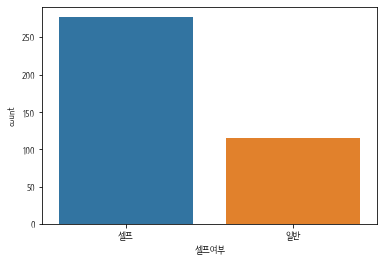

In [81]:
sns.countplot(data=all_data, x='셀프여부')

In [82]:
map = folium.Map(location=[35.160389, 129.043961], zoom_start=10)

for i in all_data.index:
    sub_lat = all_data.loc[i, '위도']
    sub_long = all_data.loc[i, '경도']
    
    title = f"{all_data.loc[i, '상호']} - {all_data.loc[i, '주소']}"
    
    color = 'blue'
    if all_data.loc[i, '셀프여부'] == '일반':
        color = 'orange'
    
    folium.CircleMarker(location=[sub_lat, sub_long],
                        radius=3,
                        color=color,
                        tooltip=title).add_to(map)
map